Ensemble Learning : The Ensemble methods in ML combine the insights obtained from multiple learning models to facilitate accurate and improved decisions
1. Baggings( Bootstarap Aggregating)
2. Boosting

#### Basic Ensemble techniques
1. Max voting : Classification analysis 
2. Averaging : Regression analysis 
3. Weighted Average : it used for high performance 

#### Advanced Ensemble techniques
1. Stacking
2. Blending
3. bagging
4. boosting

### Algorithms based on Baggings and Boosting
##### Baggings algorithms
1. Bagging meta-estimator
2. Random Forest

##### Boosting Algorithms
1. AdsBoost
2. GBM
3. XGBM
4. Light GBM
5. CatBoost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
x,y=make_moons(n_samples=1000, noise=0.2)

In [4]:
data={"x1":x[:,0],"x2":x[:,1],"y":y}

In [5]:
data=pd.DataFrame(data)

In [13]:
data.head(5)

,x1,x2,y
0,-1.151298,0.062908,0
1,0.120646,0.752912,0
2,-0.956387,0.694350,0
3,-0.420889,0.610999,0
4,0.787033,0.691993,0


In [14]:
import seaborn as sns 

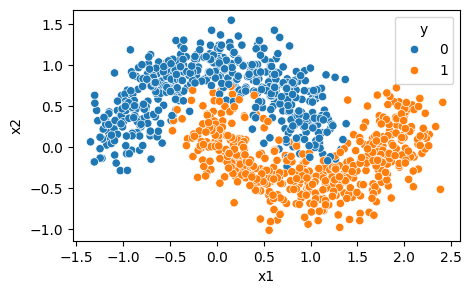

In [15]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="x1",y="x2",data=data,hue="y")
plt.show()

In [16]:
X=data.iloc[:,:-1]

In [17]:
Y=data["y"]

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [29]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)*100, dt.score(X_test,Y_test)*100

(100.0, 94.5)

In [31]:
sv=SVC()
sv.fit(X_train,Y_train)
sv.score(X_train,Y_train)*100, sv.score(X_test,Y_test)*100

(96.5, 94.5)

In [32]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
gnb.score(X_train,Y_train)*100, gnb.score(X_test,Y_test)*100

(86.875, 86.5)

### Ensemble 

In [33]:
 from sklearn.ensemble import VotingClassifier

In [34]:
li=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb",GaussianNB())]

In [42]:
vc=VotingClassifier(li,weights=[10,4,7])
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb', GaussianNB())],
                 weights=[10, 4, 7])

In [43]:
vc.score(X_train,Y_train)*100, vc.score(X_test,Y_test)*100

(96.75, 94.5)

In [48]:
pred={"dt":dt.predict(X_test), "svm":sv.predict(X_test), "gnb":gnb.predict(X_test), "VC": vc.predict(X_test)}

In [49]:
pd.DataFrame(pred)

,dt,svm,gnb,VC
0,1,1,0,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
195,1,1,1,1
196,1,1,1,1
197,1,1,1,1
198,0,0,0,0
